# Activation Functions Visualization

This notebook provides a comprehensive visualization of all activation functions available in the Enhanced ConvDecoder, along with their mathematical equations and characteristics.

## Overview

The Enhanced ConvDecoder supports 20+ activation functions from PyTorch, each with different properties suitable for various neural network architectures and training scenarios. This visualization helps understand:

- Mathematical equations for each activation function
- Input-output behavior across different ranges
- Gradient characteristics (derivative shapes)
- Practical usage recommendations

Let's explore each activation function category systematically.

In [14]:
# Import Required Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, pi, e
import sys
import os

# Add the src directory to the Python path
sys.path.insert(0, os.path.join('..', 'src'))

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Using device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

Libraries imported successfully!
PyTorch version: 2.4.0
Using device: cuda


In [15]:
# Define Activation Functions from Model
from models.dgd import ConvDecoder

# Create a dummy ConvDecoder to access the activation functions
dummy_decoder = ConvDecoder(latent_dim=32, hidden_dims=[64])

# Extract activation functions dictionary
activations = dummy_decoder.activations
final_activations = dummy_decoder.final_activations

print("Available Hidden Layer Activation Functions:")
print(f"Total: {len(activations)} functions")
for i, name in enumerate(sorted(activations.keys()), 1):
    print(f"{i:2d}. {name}")

print("\nAvailable Final Layer Activation Functions:")
print(f"Total: {len(final_activations)} functions")
for i, name in enumerate(sorted(final_activations.keys()), 1):
    print(f"{i:2d}. {name}")

# Create input range for visualization
x = torch.linspace(-5, 5, 1000)
x_numpy = x.numpy()

Available Hidden Layer Activation Functions:
Total: 27 functions
 1. celu
 2. elu
 3. gelu
 4. glu
 5. hardshrink
 6. hardsigmoid
 7. hardswish
 8. hardtanh
 9. identity
10. leaky_relu
11. logsigmoid
12. mish
13. none
14. prelu
15. relu
16. relu6
17. rrelu
18. selu
19. sigmoid
20. silu
21. softplus
22. softshrink
23. softsign
24. swish
25. tanh
26. tanhshrink
27. threshold

Available Final Layer Activation Functions:
Total: 7 functions
 1. hardsigmoid
 2. hardtanh
 3. identity
 4. none
 5. sigmoid
 6. softsign
 7. tanh


In [16]:
# Create Mathematical Equations Dictionary
# Matplotlib-compatible math equations for each activation function

equations = {
    # Standard ReLU family
    'relu': r'$f(x) = \max(0, x)$',
    'relu6': r'$f(x) = \min(\max(0, x), 6)$',
    'leaky_relu': r'$f(x) = x$ if $x > 0$, else $0.2x$',
    'prelu': r'$f(x) = x$ if $x > 0$, else $ax$ (learnable $a$)',
    'rrelu': r'$f(x) = x$ if $x > 0$, else $ax$ (random $a$)',
    
    # ELU family
    'elu': r'$f(x) = x$ if $x > 0$, else $\alpha(e^x - 1)$',
    'selu': r'$f(x) = \lambda \cdot ELU(x)$ (self-normalizing)',
    'celu': r'$f(x) = x$ if $x > 0$, else $\alpha(e^{x/\alpha} - 1)$',
    
    # Sigmoid family
    'sigmoid': r'$f(x) = \frac{1}{1 + e^{-x}}$',
    'tanh': r'$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$',
    'hardsigmoid': r'$f(x) = \max(0, \min(1, \frac{x + 3}{6}))$',
    'hardtanh': r'$f(x) = \max(-1, \min(1, x))$',
    'logsigmoid': r'$f(x) = \log\left(\frac{1}{1 + e^{-x}}\right)$',
    
    # Modern activations
    'gelu': r'$f(x) = x \cdot \Phi(x)$ (Gaussian CDF)',
    'swish': r'$f(x) = x \cdot \sigma(x) = \frac{x}{1 + e^{-x}}$',
    'silu': r'$f(x) = x \cdot \sigma(x)$ (same as Swish)',
    'mish': r'$f(x) = x \cdot \tanh(\ln(1 + e^x))$',
    'hardswish': r'$f(x) = x \cdot \mathrm{hardsigmoid}(x)$',
    
    # Soft functions
    'softplus': r'$f(x) = \ln(1 + e^x)$',
    'softsign': r'$f(x) = \frac{x}{1 + |x|}$',
    'softshrink': r'$f(x) = \mathrm{sign}(x) \max(|x| - \lambda, 0)$',
    'hardshrink': r'$f(x) = x$ if $|x| > \lambda$, else $0$',
    'tanhshrink': r'$f(x) = x - \tanh(x)$',
    
    # Special
    'threshold': r'$f(x) = x$ if $x > \mathrm{thresh}$, else $\mathrm{value}$',
    'glu': r'$f(x) = x_1 \cdot \sigma(x_2)$ (splits input)',
    'identity': r'$f(x) = x$',
    'none': r'$f(x) = x$'
}

print("Mathematical equations defined for all activation functions!")
print(f"Total equations: {len(equations)}")
print("Note: Equations use matplotlib-compatible math text format")

Mathematical equations defined for all activation functions!
Total equations: 27
Note: Equations use matplotlib-compatible math text format


## Section 1: Standard ReLU-based Activation Functions

ReLU (Rectified Linear Unit) and its variants are among the most popular activation functions in deep learning due to their simplicity and effectiveness in preventing vanishing gradient problems.

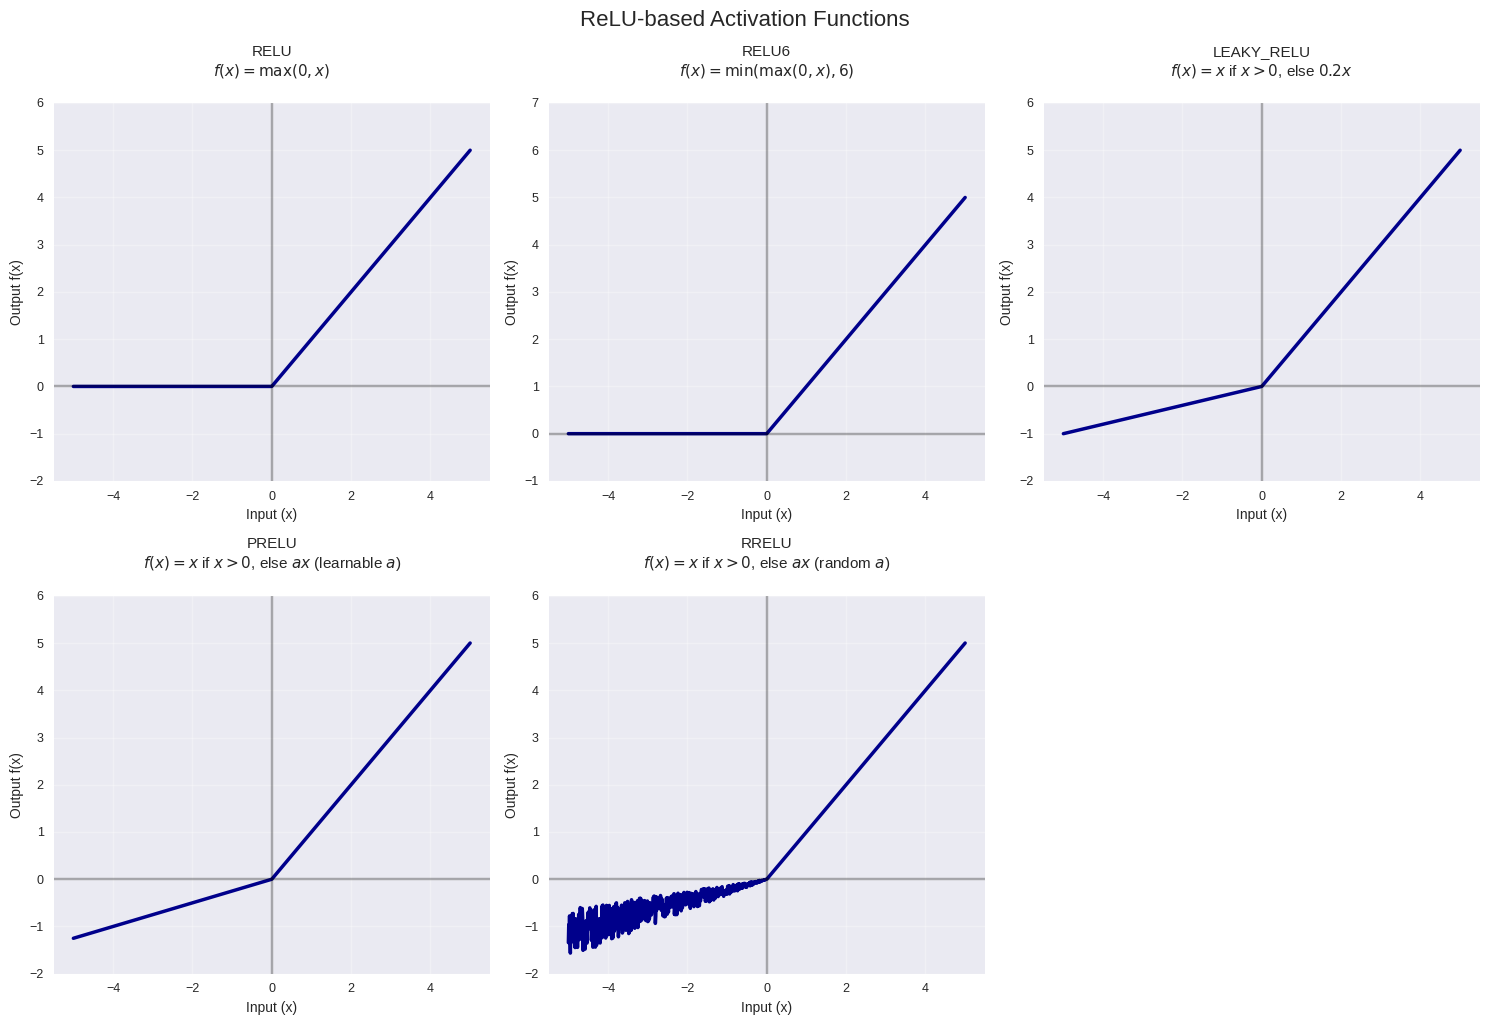

ReLU Family Characteristics:
• ReLU: Simple, fast, but can cause dead neurons
• ReLU6: Bounded version, good for mobile/quantized models
• Leaky ReLU: Prevents dead neurons with small negative slope
• PReLU: Learnable negative slope parameter
• RReLU: Random negative slope during training


In [17]:
# Visualize Standard ReLU-based Activation Functions
relu_functions = ['relu', 'relu6', 'leaky_relu', 'prelu', 'rrelu']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, func_name in enumerate(relu_functions):
    if func_name in activations:
        # Get the activation function
        activation_func = activations[func_name]
        
        # Apply the function
        with torch.no_grad():
            if func_name == 'glu':
                # GLU requires even-sized input (splits in half)
                x_glu = torch.cat([x, x], dim=0).view(1, -1)
                y = activation_func(x_glu).flatten()
                y_numpy = y[:len(x)].numpy()
            else:
                y = activation_func(x)
                y_numpy = y.numpy()
        
        # Plot the function
        axes[i].plot(x_numpy, y_numpy, linewidth=2.5, color='darkblue')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)')
        axes[i].set_ylabel('Output f(x)')
        axes[i].set_title(f'{func_name.upper()}\n{equations.get(func_name, "No equation available")}', 
                         fontsize=11, pad=20)
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Set reasonable y-limits
        if func_name == 'relu6':
            axes[i].set_ylim(-1, 7)
        else:
            axes[i].set_ylim(-2, 6)

# Hide the extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.suptitle('ReLU-based Activation Functions', fontsize=16, y=1.02)
plt.show()

# Print characteristics
print("ReLU Family Characteristics:")
print("• ReLU: Simple, fast, but can cause dead neurons")
print("• ReLU6: Bounded version, good for mobile/quantized models")
print("• Leaky ReLU: Prevents dead neurons with small negative slope")
print("• PReLU: Learnable negative slope parameter")
print("• RReLU: Random negative slope during training")

## Section 2: ELU-based Activation Functions

Exponential Linear Units (ELU) and their variants provide smooth negative parts that help with gradient flow and can lead to faster learning.

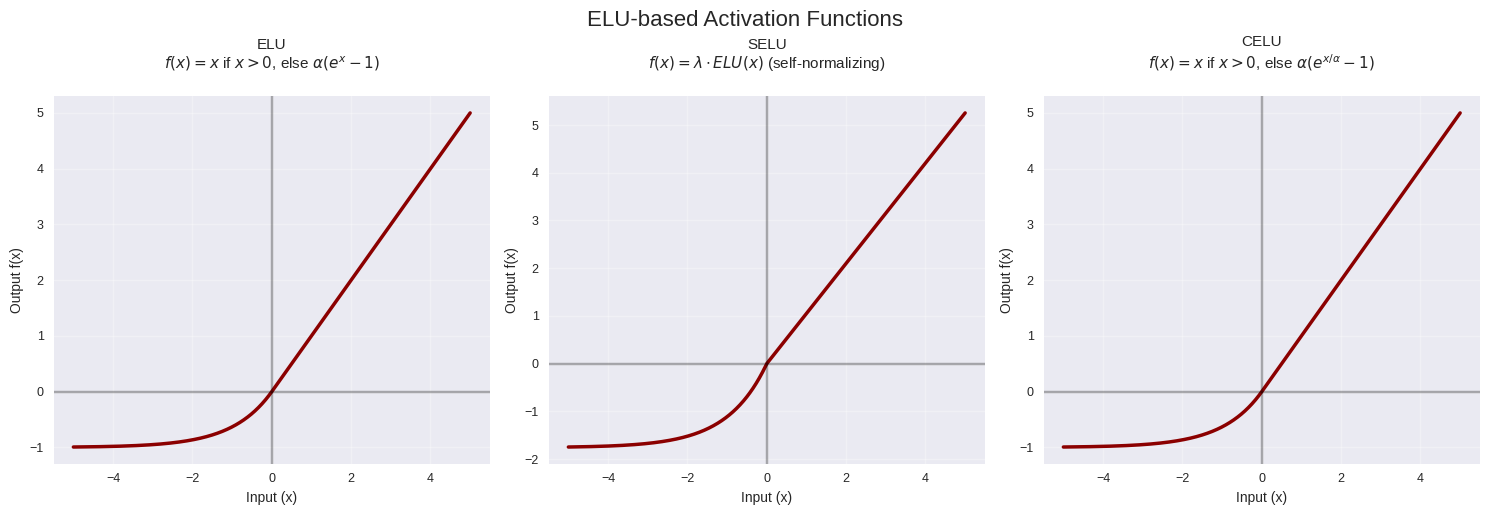

ELU Family Characteristics:
• ELU: Smooth negative part, faster learning than ReLU
• SELU: Self-normalizing properties, good for deep networks
• CELU: Continuously differentiable version of ELU


In [18]:
# Visualize ELU-based Activation Functions
elu_functions = ['elu', 'selu', 'celu']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, func_name in enumerate(elu_functions):
    if func_name in activations:
        # Get the activation function
        activation_func = activations[func_name]
        
        # Apply the function
        with torch.no_grad():
            y = activation_func(x)
            y_numpy = y.numpy()
        
        # Plot the function
        axes[i].plot(x_numpy, y_numpy, linewidth=2.5, color='darkred')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)')
        axes[i].set_ylabel('Output f(x)')
        axes[i].set_title(f'{func_name.upper()}\n{equations.get(func_name, "No equation available")}', 
                         fontsize=11, pad=20)
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.suptitle('ELU-based Activation Functions', fontsize=16, y=1.02)
plt.show()

# Print characteristics
print("ELU Family Characteristics:")
print("• ELU: Smooth negative part, faster learning than ReLU")
print("• SELU: Self-normalizing properties, good for deep networks")
print("• CELU: Continuously differentiable version of ELU")

## Section 3: Sigmoid-like Activation Functions

These functions provide smooth, bounded outputs and are particularly useful for final layers or when you need outputs in specific ranges.

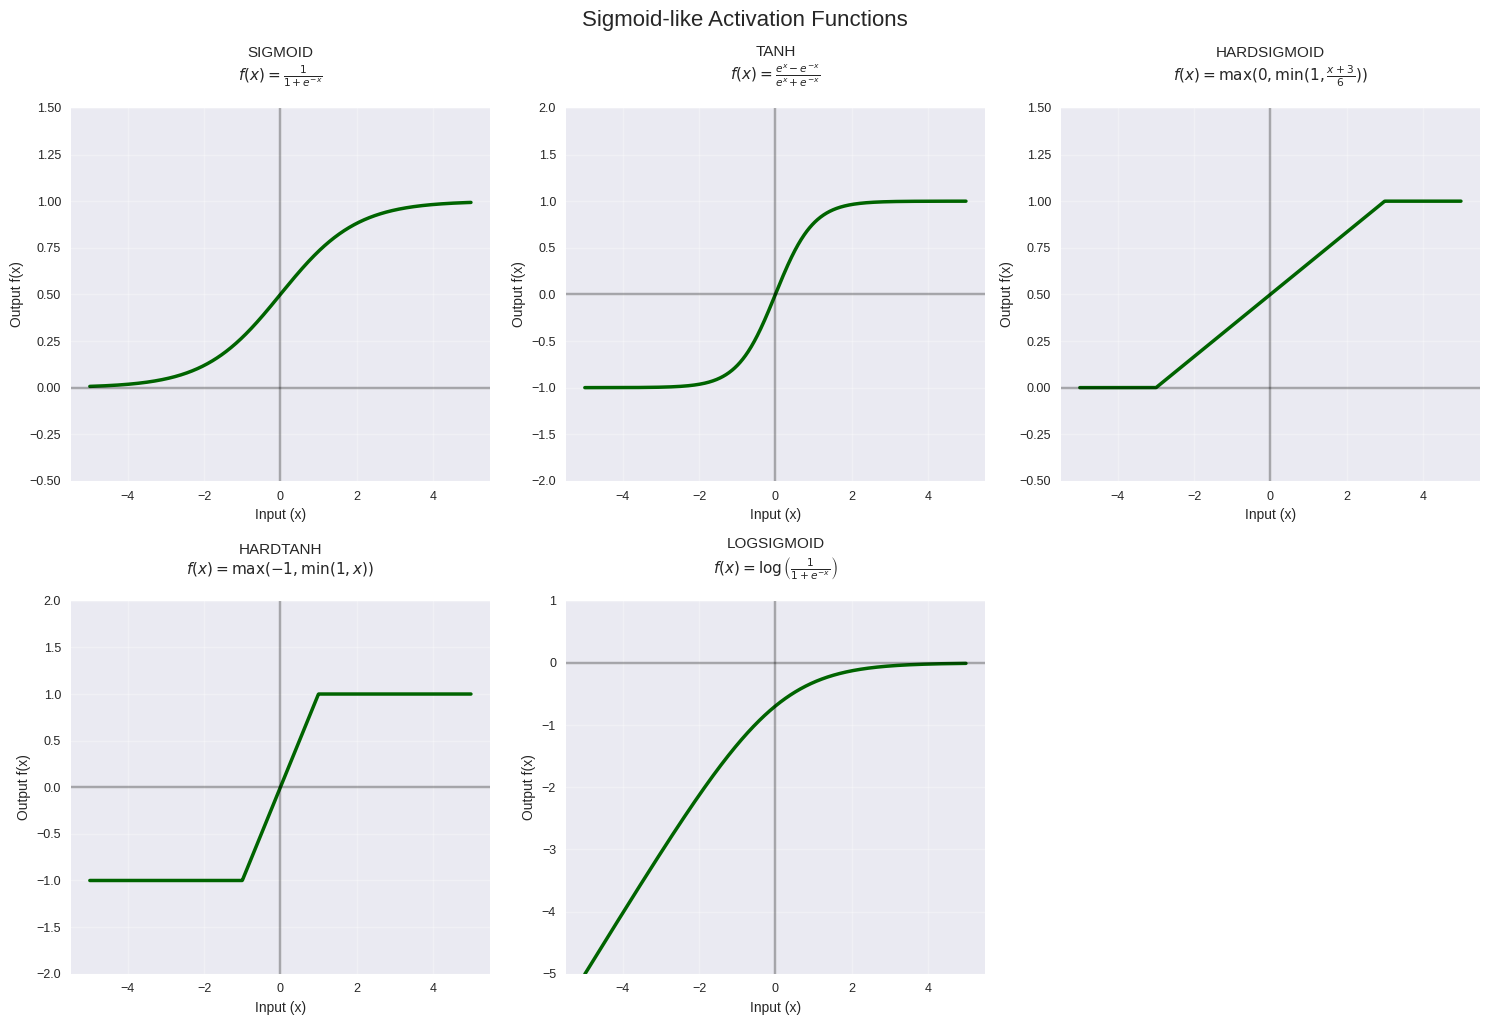

Sigmoid Family Characteristics:
• Sigmoid: Classic S-curve, outputs in (0,1), prone to vanishing gradients
• Tanh: Zero-centered version of sigmoid, outputs in (-1,1)
• Hard Sigmoid: Piecewise linear approximation, computationally efficient
• Hard Tanh: Piecewise linear approximation of tanh
• Log Sigmoid: Logarithm of sigmoid, numerically stable


In [19]:
# Visualize Sigmoid-like Activation Functions
sigmoid_functions = ['sigmoid', 'tanh', 'hardsigmoid', 'hardtanh', 'logsigmoid']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, func_name in enumerate(sigmoid_functions):
    if func_name in activations or func_name in final_activations:
        # Get the activation function from either dictionary
        activation_func = activations.get(func_name) or final_activations.get(func_name)
        
        # Apply the function
        with torch.no_grad():
            y = activation_func(x)
            y_numpy = y.numpy()
        
        # Plot the function
        axes[i].plot(x_numpy, y_numpy, linewidth=2.5, color='darkgreen')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)')
        axes[i].set_ylabel('Output f(x)')
        axes[i].set_title(f'{func_name.upper()}\n{equations.get(func_name, "No equation available")}', 
                         fontsize=11, pad=20)
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Set appropriate y-limits based on function
        if func_name == 'logsigmoid':
            axes[i].set_ylim(-5, 1)
        elif func_name in ['hardsigmoid', 'sigmoid']:
            axes[i].set_ylim(-0.5, 1.5)
        else:
            axes[i].set_ylim(-2, 2)

# Hide the extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.suptitle('Sigmoid-like Activation Functions', fontsize=16, y=1.02)
plt.show()

# Print characteristics
print("Sigmoid Family Characteristics:")
print("• Sigmoid: Classic S-curve, outputs in (0,1), prone to vanishing gradients")
print("• Tanh: Zero-centered version of sigmoid, outputs in (-1,1)")
print("• Hard Sigmoid: Piecewise linear approximation, computationally efficient")
print("• Hard Tanh: Piecewise linear approximation of tanh")
print("• Log Sigmoid: Logarithm of sigmoid, numerically stable")

## Section 4: Modern/Specialized Activation Functions

These are newer activation functions that often provide better performance than traditional ones, especially in deeper networks.

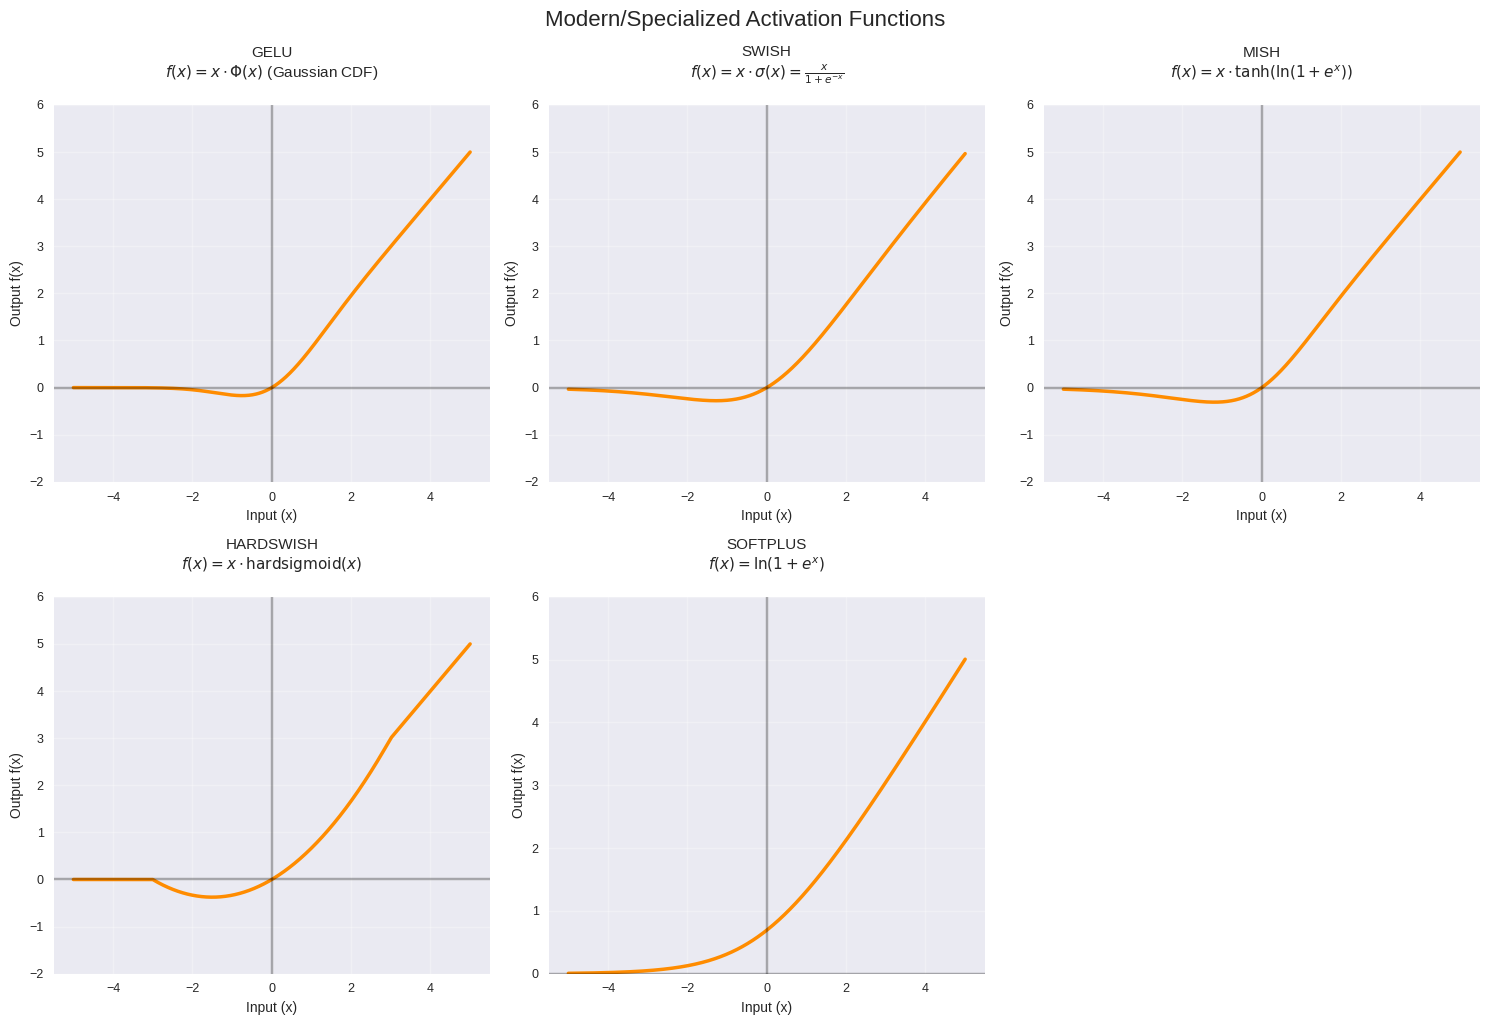

Modern Activation Functions Characteristics:
• GELU: Gaussian Error Linear Unit, smooth, good for Transformers
• Swish/SiLU: Self-gated, smooth, often outperforms ReLU
• Mish: Smooth, self-regularizing, good for deeper networks
• Hard Swish: Efficient approximation of Swish for mobile
• Softplus: Smooth approximation of ReLU, always positive


In [20]:
# Visualize Modern/Specialized Activation Functions
modern_functions = ['gelu', 'swish', 'mish', 'hardswish', 'softplus']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, func_name in enumerate(modern_functions):
    if func_name in activations:
        # Get the activation function
        activation_func = activations[func_name]
        
        # Apply the function
        with torch.no_grad():
            y = activation_func(x)
            y_numpy = y.numpy()
        
        # Plot the function
        axes[i].plot(x_numpy, y_numpy, linewidth=2.5, color='darkorange')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)')
        axes[i].set_ylabel('Output f(x)')
        axes[i].set_title(f'{func_name.upper()}\n{equations.get(func_name, "No equation available")}', 
                         fontsize=11, pad=20)
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Set appropriate y-limits
        if func_name == 'softplus':
            axes[i].set_ylim(0, 6)
        else:
            axes[i].set_ylim(-2, 6)

# Hide the extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.suptitle('Modern/Specialized Activation Functions', fontsize=16, y=1.02)
plt.show()

# Print characteristics
print("Modern Activation Functions Characteristics:")
print("• GELU: Gaussian Error Linear Unit, smooth, good for Transformers")
print("• Swish/SiLU: Self-gated, smooth, often outperforms ReLU")
print("• Mish: Smooth, self-regularizing, good for deeper networks")
print("• Hard Swish: Efficient approximation of Swish for mobile")
print("• Softplus: Smooth approximation of ReLU, always positive")

## Section 5: Shrinkage and Special Functions

These functions have unique properties like shrinkage, thresholding, or special mathematical behaviors.

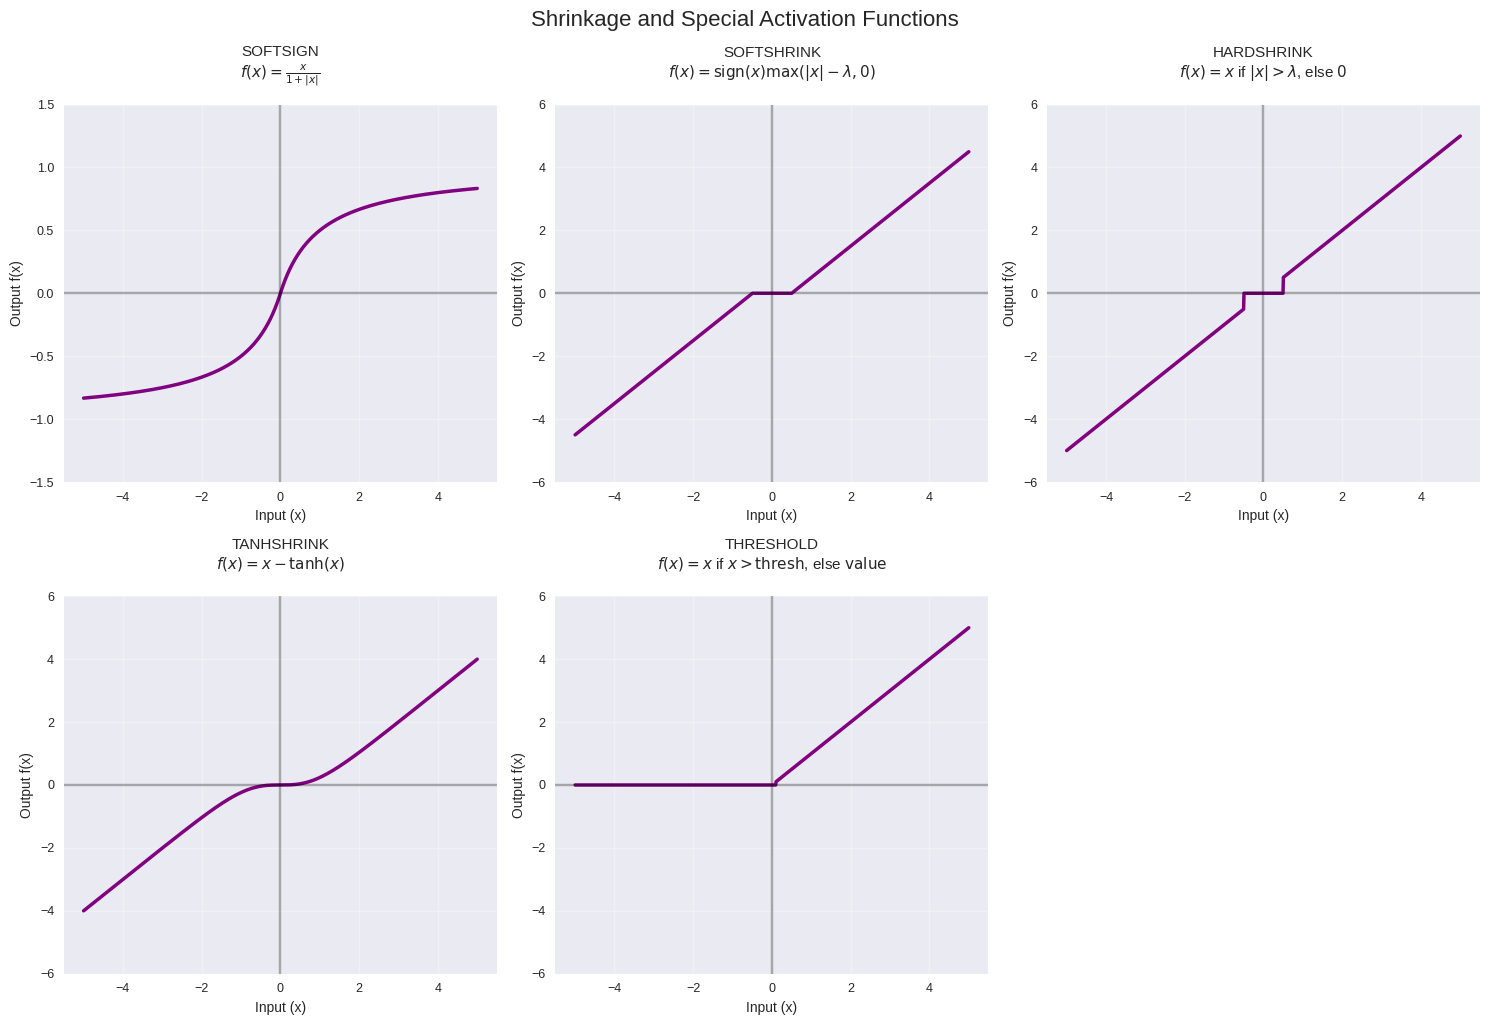

Special Functions Characteristics:
• Softsign: Bounded alternative to tanh, slower saturation
• Softshrink: Soft thresholding, useful for sparse coding
• Hardshrink: Hard thresholding, creates sparse representations
• Tanhshrink: Identity minus tanh, unbounded
• Threshold: Step function with configurable threshold and value


In [21]:
# Visualize Shrinkage and Special Functions
special_functions = ['softsign', 'softshrink', 'hardshrink', 'tanhshrink', 'threshold']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, func_name in enumerate(special_functions):
    if func_name in activations:
        # Get the activation function
        activation_func = activations[func_name]
        
        # Apply the function
        with torch.no_grad():
            y = activation_func(x)
            y_numpy = y.numpy()
        
        # Plot the function
        axes[i].plot(x_numpy, y_numpy, linewidth=2.5, color='purple')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)')
        axes[i].set_ylabel('Output f(x)')
        axes[i].set_title(f'{func_name.upper()}\n{equations.get(func_name, "No equation available")}', 
                         fontsize=11, pad=20)
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Set appropriate y-limits
        if func_name == 'softsign':
            axes[i].set_ylim(-1.5, 1.5)
        elif func_name == 'tanhshrink':
            axes[i].set_ylim(-6, 6)
        else:
            axes[i].set_ylim(-6, 6)

# Hide the extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.suptitle('Shrinkage and Special Activation Functions', fontsize=16, y=1.02)
plt.show()

# Print characteristics
print("Special Functions Characteristics:")
print("• Softsign: Bounded alternative to tanh, slower saturation")
print("• Softshrink: Soft thresholding, useful for sparse coding")
print("• Hardshrink: Hard thresholding, creates sparse representations")
print("• Tanhshrink: Identity minus tanh, unbounded")
print("• Threshold: Step function with configurable threshold and value")

## Section 6: Comprehensive Comparison

Let's compare the most important activation functions side by side to understand their relative behaviors.

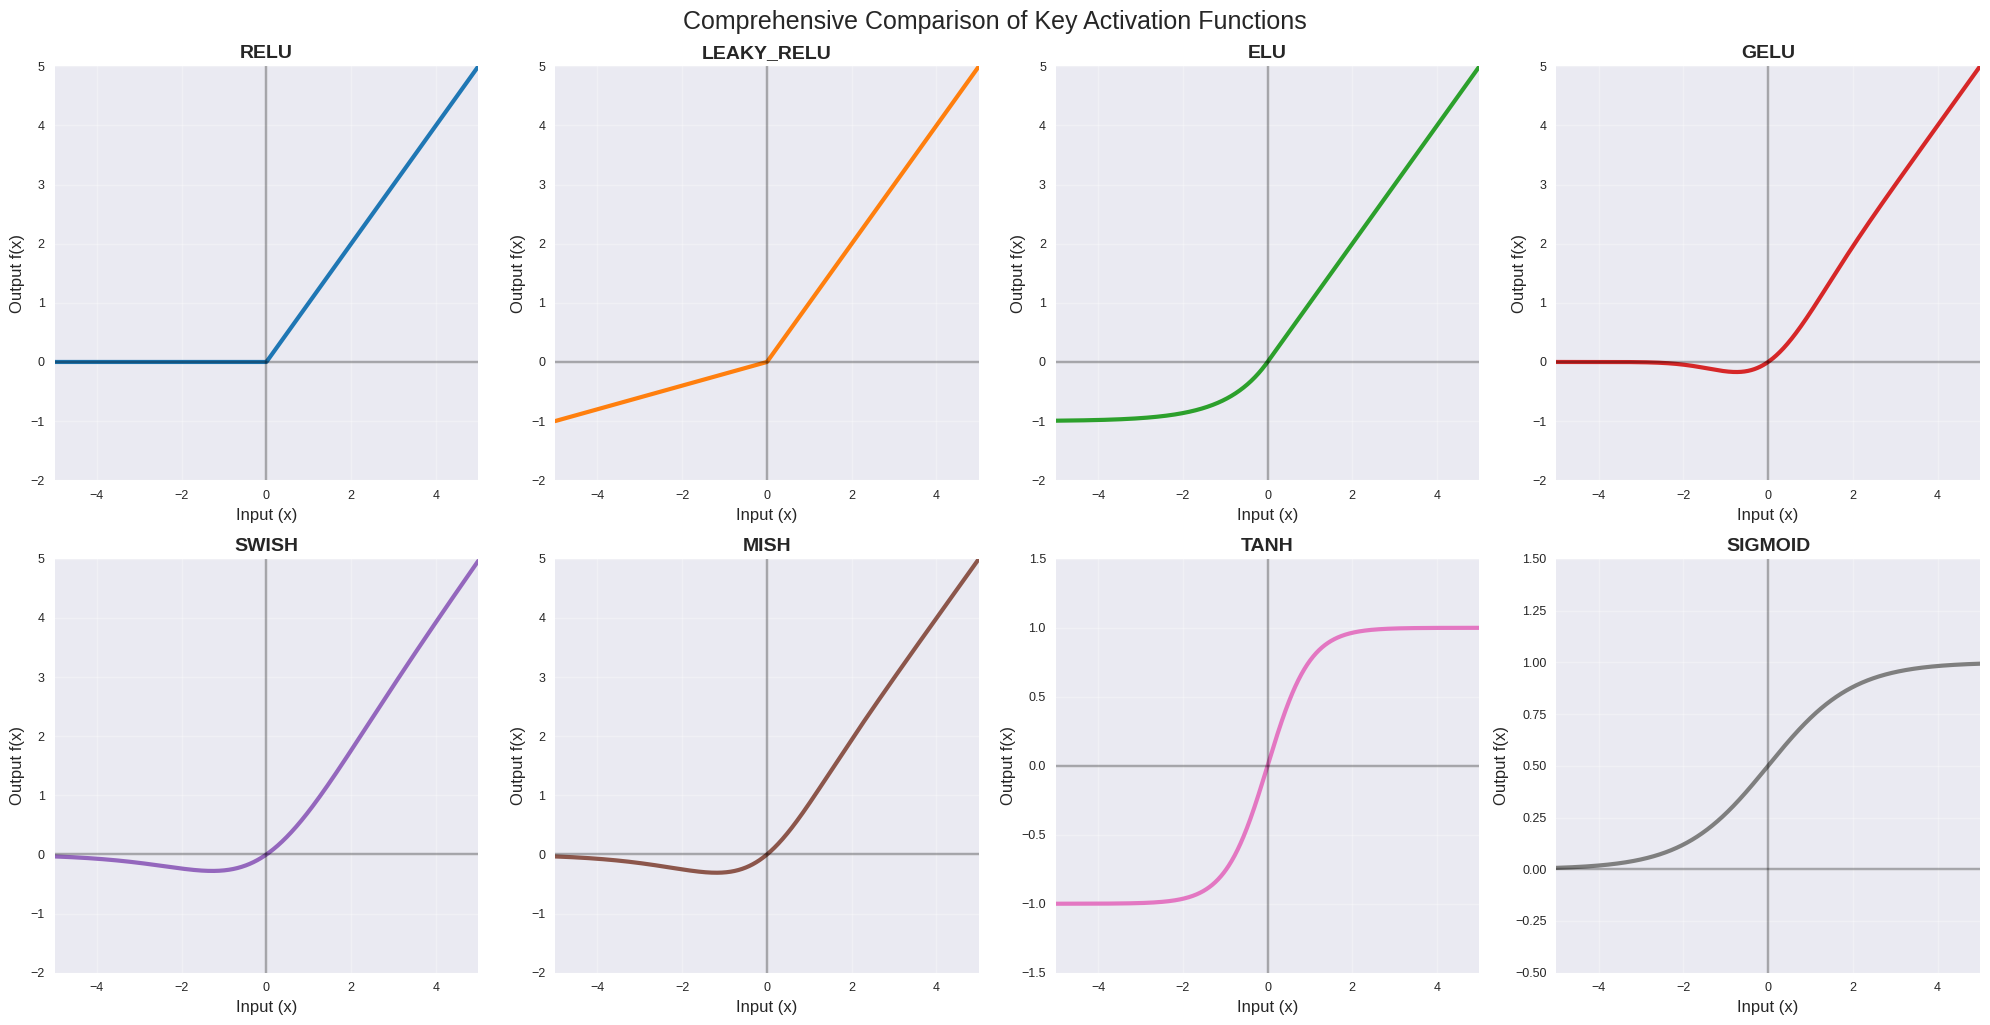

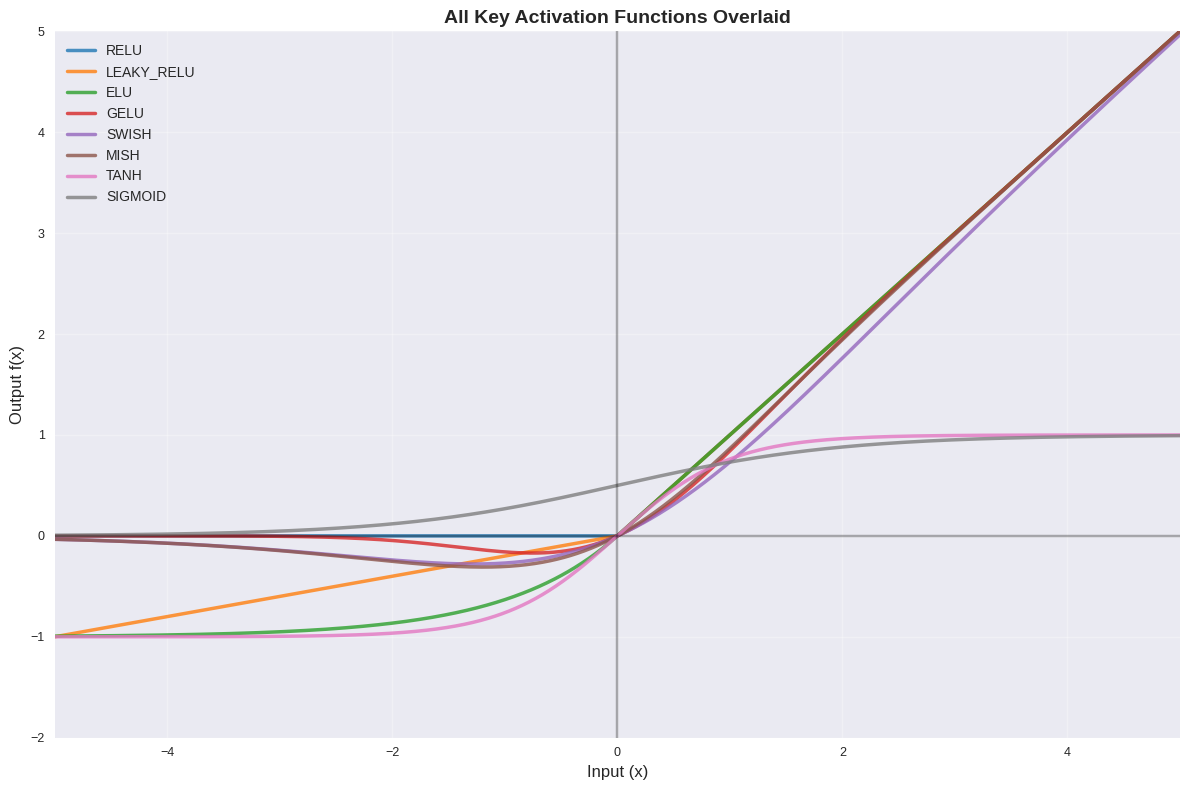

In [22]:
# Comprehensive Comparison of Key Activation Functions
key_functions = ['relu', 'leaky_relu', 'elu', 'gelu', 'swish', 'mish', 'tanh', 'sigmoid']

# Create a large comparison plot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

for i, func_name in enumerate(key_functions):
    if func_name in activations or func_name in final_activations:
        # Get the activation function
        activation_func = activations.get(func_name) or final_activations.get(func_name)
        
        # Apply the function
        with torch.no_grad():
            y = activation_func(x)
            y_numpy = y.numpy()
        
        # Plot the function
        axes[i].plot(x_numpy, y_numpy, linewidth=3, color=colors[i], label=func_name.upper())
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)', fontsize=12)
        axes[i].set_ylabel('Output f(x)', fontsize=12)
        axes[i].set_title(f'{func_name.upper()}', fontsize=14, fontweight='bold')
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Set consistent limits for better comparison
        axes[i].set_xlim(-5, 5)
        if func_name in ['sigmoid']:
            axes[i].set_ylim(-0.5, 1.5)
        elif func_name in ['tanh']:
            axes[i].set_ylim(-1.5, 1.5)
        else:
            axes[i].set_ylim(-2, 5)

plt.tight_layout()
plt.suptitle('Comprehensive Comparison of Key Activation Functions', fontsize=18, y=1.02)
plt.show()

# Single plot with all functions overlaid
plt.figure(figsize=(12, 8))
for i, func_name in enumerate(key_functions):
    if func_name in activations or func_name in final_activations:
        activation_func = activations.get(func_name) or final_activations.get(func_name)
        with torch.no_grad():
            y = activation_func(x)
            y_numpy = y.numpy()
        plt.plot(x_numpy, y_numpy, linewidth=2.5, color=colors[i], label=func_name.upper(), alpha=0.8)

plt.grid(True, alpha=0.3)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output f(x)', fontsize=12)
plt.title('All Key Activation Functions Overlaid', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-2, 5)
plt.tight_layout()
plt.show()

## Section 7: Activation Function Derivatives

Understanding the derivatives helps explain gradient flow behavior and training dynamics.

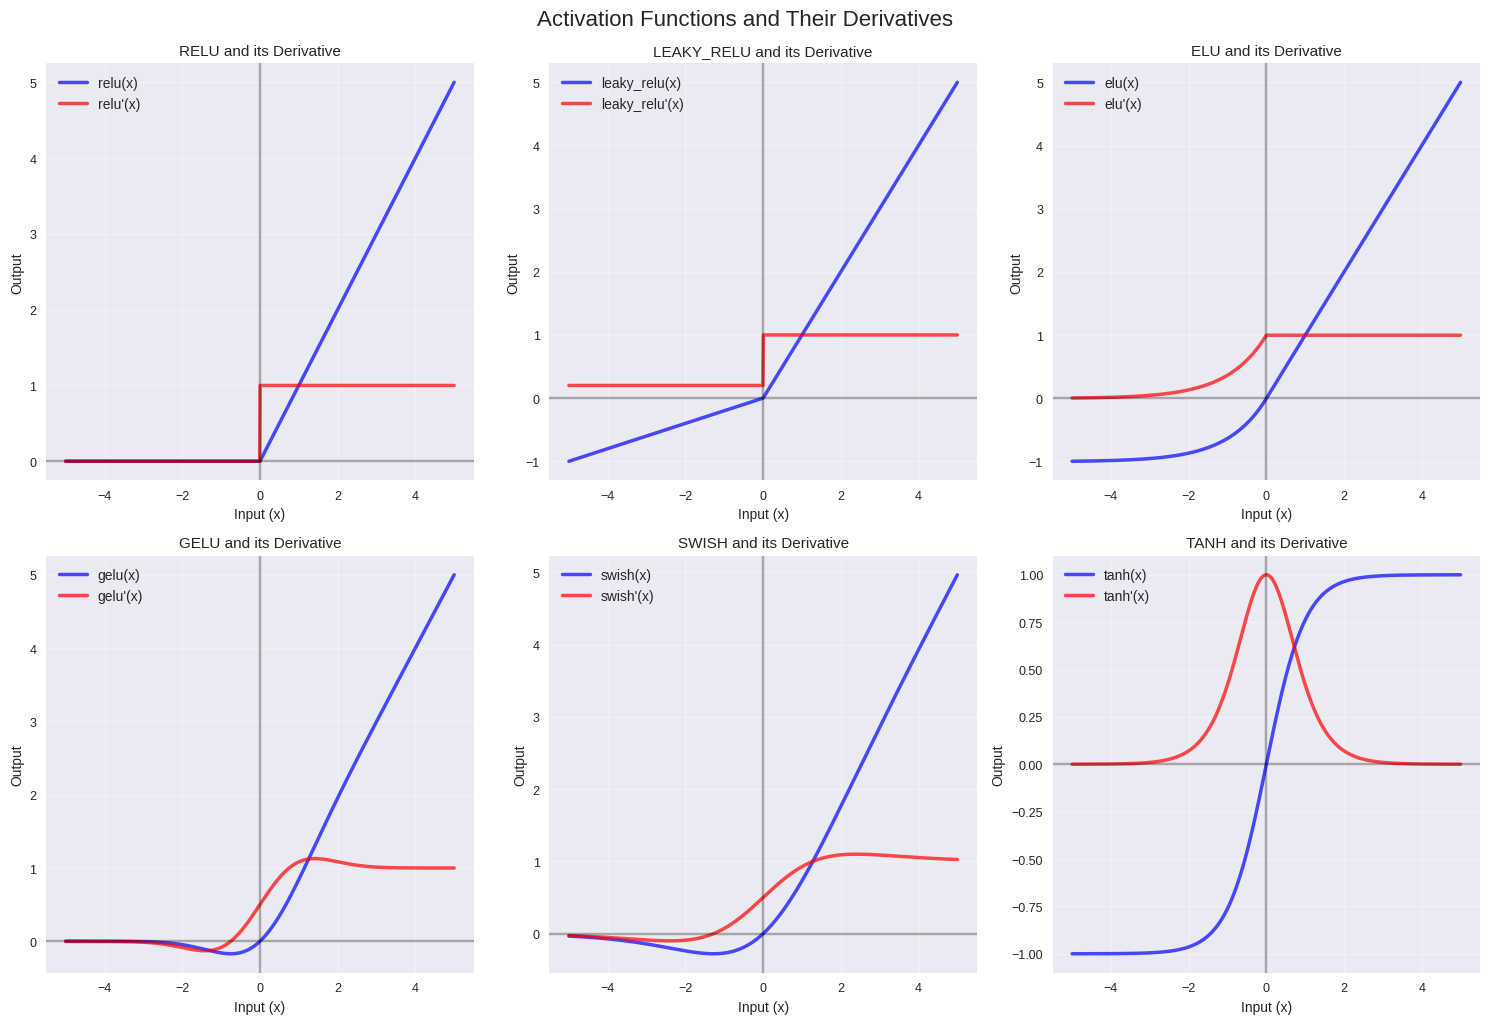

Derivative Analysis:
• ReLU: Derivative is 0 or 1 (step function)
• Leaky ReLU: Derivative is 0.2 or 1 (step function)
• ELU: Smooth derivative, approaches 0 for negative values
• GELU: Smooth derivative, bell-shaped
• Swish: Self-gating derivative, can amplify or suppress
• Tanh: Smooth derivative, maximum at x=0


In [23]:
# Visualize Derivatives of Key Activation Functions
derivative_functions = ['relu', 'leaky_relu', 'elu', 'gelu', 'swish', 'tanh']

# Create input that requires gradient
x_grad = torch.linspace(-5, 5, 1000, requires_grad=True)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, func_name in enumerate(derivative_functions):
    if func_name in activations:
        # Get the activation function
        activation_func = activations[func_name]
        
        # Compute function and derivative
        y = activation_func(x_grad)
        
        # Compute gradient
        grad_outputs = torch.ones_like(y)
        y.backward(grad_outputs, retain_graph=True)
        derivative = x_grad.grad.clone()
        x_grad.grad.zero_()
        
        # Convert to numpy
        x_numpy = x_grad.detach().numpy()
        y_numpy = y.detach().numpy()
        derivative_numpy = derivative.numpy()
        
        # Plot both function and derivative
        axes[i].plot(x_numpy, y_numpy, linewidth=2.5, color='blue', label=f'{func_name}(x)', alpha=0.7)
        axes[i].plot(x_numpy, derivative_numpy, linewidth=2.5, color='red', label=f"{func_name}'(x)", alpha=0.7)
        
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (x)')
        axes[i].set_ylabel('Output')
        axes[i].set_title(f'{func_name.upper()} and its Derivative', fontsize=11)
        axes[i].legend()
        
        # Add zero lines
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.suptitle('Activation Functions and Their Derivatives', fontsize=16, y=1.02)
plt.show()

print("Derivative Analysis:")
print("• ReLU: Derivative is 0 or 1 (step function)")
print("• Leaky ReLU: Derivative is 0.2 or 1 (step function)")
print("• ELU: Smooth derivative, approaches 0 for negative values")
print("• GELU: Smooth derivative, bell-shaped")
print("• Swish: Self-gating derivative, can amplify or suppress")
print("• Tanh: Smooth derivative, maximum at x=0")

## Section 8: Practical Recommendations

Based on the visualizations and mathematical properties, here are practical recommendations for choosing activation functions in different scenarios.

In [24]:
# Create a comprehensive recommendation table
import pandas as pd

recommendations = {
    'Use Case': [
        'General Purpose (Default)',
        'Deep Networks (>10 layers)',
        'Mobile/Edge Deployment',
        'Transformer Architectures',
        'Generative Models',
        'Final Layer (Probability)',
        'Final Layer (Bounded [-1,1])',
        'Sparse Representations',
        'Fast Training',
        'Research/Experimentation'
    ],
    'Recommended Activation': [
        'ReLU, Leaky ReLU',
        'GELU, Swish, Mish',
        'ReLU6, Hard Swish',
        'GELU',
        'Swish, GELU, Leaky ReLU',
        'Sigmoid',
        'Tanh, Hard Tanh',
        'ReLU, Hard Shrink',
        'ReLU, Leaky ReLU',
        'Mish, Swish, SELU'
    ],
    'Why This Choice': [
        'Simple, fast, proven effective',
        'Smooth gradients, better flow',
        'Efficient computation, low memory',
        'Proven in attention mechanisms',
        'Smooth, unbounded, good gradients',
        'Output range [0,1] for probabilities',
        'Zero-centered, bounded output',
        'Creates sparse activations',
        'Minimal computation overhead',
        'Often superior performance'
    ],
    'Alternatives': [
        'GELU, Swish',
        'ELU, SELU',
        'ReLU, Sigmoid',
        'Swish, ReLU',
        'Mish, ELU',
        'Hard Sigmoid',
        'Sigmoid, Softsign',
        'Soft Shrink, Threshold',
        'ReLU6',
        'ELU, PReLU'
    ]
}

rec_df = pd.DataFrame(recommendations)
print("ACTIVATION FUNCTION RECOMMENDATIONS")
print("=" * 80)
for i, row in rec_df.iterrows():
    print(f"\n{row['Use Case']:.<30} {row['Recommended Activation']}")
    print(f"  Why: {row['Why This Choice']}")
    print(f"  Alternatives: {row['Alternatives']}")

print("\n\nGENERAL GUIDELINES:")
print("• Start with ReLU or Leaky ReLU for most applications")
print("• Use GELU or Swish for better performance in deeper networks")
print("• Avoid Sigmoid/Tanh in hidden layers (vanishing gradients)")
print("• Consider computational cost for mobile deployment")
print("• Experiment with modern activations (Mish, Swish) for research")
print("• Match final activation to your output requirements")

ACTIVATION FUNCTION RECOMMENDATIONS

General Purpose (Default)..... ReLU, Leaky ReLU
  Why: Simple, fast, proven effective
  Alternatives: GELU, Swish

Deep Networks (>10 layers).... GELU, Swish, Mish
  Why: Smooth gradients, better flow
  Alternatives: ELU, SELU

Mobile/Edge Deployment........ ReLU6, Hard Swish
  Why: Efficient computation, low memory
  Alternatives: ReLU, Sigmoid

Transformer Architectures..... GELU
  Why: Proven in attention mechanisms
  Alternatives: Swish, ReLU

Generative Models............. Swish, GELU, Leaky ReLU
  Why: Smooth, unbounded, good gradients
  Alternatives: Mish, ELU

Final Layer (Probability)..... Sigmoid
  Why: Output range [0,1] for probabilities
  Alternatives: Hard Sigmoid

Final Layer (Bounded [-1,1]).. Tanh, Hard Tanh
  Why: Zero-centered, bounded output
  Alternatives: Sigmoid, Softsign

Sparse Representations........ ReLU, Hard Shrink
  Why: Creates sparse activations
  Alternatives: Soft Shrink, Threshold

Fast Training................. Re

## Summary

This notebook has provided a comprehensive visualization of all 20+ activation functions available in the Enhanced ConvDecoder. Key takeaways:

### Function Categories:
1. **ReLU Family**: Fast, simple, but can have dead neurons
2. **ELU Family**: Smooth negative parts, better gradient flow
3. **Sigmoid Family**: Bounded outputs, good for final layers
4. **Modern Functions**: Often superior performance (GELU, Swish, Mish)
5. **Special Functions**: Unique properties for specific use cases

### Mathematical Properties:
- **Smoothness**: Affects gradient flow and optimization
- **Boundedness**: Important for output layers and stability
- **Zero-centered**: Helps with convergence
- **Monotonicity**: Preserves input ordering

### Practical Impact:
- Choose based on your specific use case and requirements
- Consider computational efficiency for deployment
- Experiment with modern activations for potential performance gains
- Always validate empirically on your specific task

The Enhanced ConvDecoder's flexibility in activation function choice allows for optimal performance across diverse applications and architectures.